# Đồ án Lý thuyết Cuối Kỳ
# Môn: Lập trình Khoa học Dữ liệu
## Nhóm: 24

### Thành viên
|<center><div style="width:150px">MSSV</div><center>|<div style="width:290px">Họ và tên</div>|
|---------- |:-------------:|
| <center>20120623<center>  |  Trần Thái Vỹ |
| <center>21120035<center>  |  Nguyễn Hoài An |
| <center>21120531<center>  |  Nguyễn Văn Phúc | 

# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings  # Để loại bỏ các warning
warnings.filterwarnings("ignore")


# Thu thập dữ liệu

- Nhóm sử dụng dữ liệu "FastFoodNutritionMenuV3.csv" tại [Fast Food Nutrition](https://www.kaggle.com/datasets/joebeachcapital/fast-food)
- Tập dữ liệu mô tả thành phần giá trị dinh dưỡng của các món ăn tại 6 cửa hàng thức ăn nhanh: 
    - McDonald's
    - Burger King
    - Wendy's
    - KFC
    - Taco Bell
    - Pizza Hut
- LICENSE của dữ liệu là [Database Contents License (DbCL) v1.0](https://opendatacommons.org/licenses/dbcl/1-0/), người dùng được phép sử dụng với mục đích phi thương mại.
- Tác giả thu thập dữ liệu tại website [Food Nutrition Data](https://www.nutrition-charts.com/).

### Đọc dữ liệu vào Dataframe `fastfood_df`

In [2]:
# Đọc dữ liệu từ file csv
fastfood_df = pd.read_csv('FastFoodNutritionMenuV3.csv')

# Bỏ các kí tự '\n' có trong tên các cột
fastfood_df.columns = fastfood_df.columns.str.replace('\n', '')

In [3]:
# Hiển thị 10 dòng đầu tiên
fastfood_df.head()

,Company,Item,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Fiber(g),Sugars(g),Protein(g),Weight WatchersPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [4]:
# Hiển thị thông tin của dữ liệu
fastfood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              1147 non-null   object
 1   Item                 1147 non-null   object
 2   Calories             1147 non-null   object
 3   Calories fromFat     642 non-null    object
 4   Total Fat(g)         1091 non-null   object
 5   Saturated Fat(g)     1091 non-null   object
 6   Trans Fat(g)         1091 non-null   object
 7   Cholesterol(mg)      1147 non-null   object
 8   Sodium (mg)          1147 non-null   object
 9   Carbs(g)             1091 non-null   object
 10  Fiber(g)             1091 non-null   object
 11  Sugars(g)            1147 non-null   object
 12  Protein(g)           1091 non-null   object
 13  Weight WatchersPnts  887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


# Tiền xử lý và khám phá dữ liệu

### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [5]:
num_rows, num_cols = fastfood_df.shape
num_rows, num_cols

(1147, 14)

### Mỗi dòng có ý nghĩa gì?

Mỗi dòng trong tập dữ liệu hiển thị thông tin về thành phần giá trị dinh dưỡng của món ăn tại các cửa hàng thức ăn nhanh.

### Dữ liệu các dòng có bị lặp không?

Kiểm tra số lượng dòng lặp bằng cách lưu kết quả vào biến `have_duplicated_rows`. Nếu `have_duplicated_rows` = 0 thì các dòng dữ liệu không bị lặp. Nếu `have_duplicated_rows` $\geq$ 0, sẽ trả về số lượng dòng bị lặp.

In [6]:
num_duplicated_rows = fastfood_df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Các dòng dữ liệu không bị lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị lặp.")

Dữ liệu có 7 dòng bị lặp.


Dữ liệu có 7 dòng bị lặp, ta tiến hành xóa các dòng lặp.

In [7]:
fastfood_df = fastfood_df.drop_duplicates()

### Mỗi cột có ý nghĩa gì?

Ý nghĩa các cột có trong `fastfood_df`:
- **Company**: Tên cửa hàng thức ăn nhanh
- **Item**: Tên món ăn
- **Calories**: Tổng số lượng năng lượng (calo) mà món ăn cung cấp
- **Calories from Fat**: Số calo từ chất béo trong món ăn
- **Total Fat(g)**: Tổng lượng chất béo trong món ăn
- **Saturated Fat(g)**: Lượng chất béo bão hòa có trong món ăn
- **Trans Fat(g)**: Lượng chất béo chuyển hóa có trong món ăn
- **Cholesterol(mg)**: Lượng cholesterol có trong món ăn
- **Sodium (mg)**: Lượng natri trong món ăn
- **Carbs(g)**: Lượng carbohydrate trong món ăn
- **Fiber(g)**: Lượng chất xơ có trong món ăn
- **Sugars(g)**: Lượng đường có trong món ăn
- **Protein(g)**: Lượng protein có trong món ăn
- **Weight WatchersPnts**: Điểm đánh giá giá trị dinh dưỡng của món ăn (dựa trên một thuật toán tính đến lượng calo, chất béo, protein, đường và chất xơ có trong thực phẩm)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta tiến hành lấy `dtype` của mỗi cột trong `fastfood_df`.

In [8]:
# Kiểu dữ liệu của từng cột
fastfood_df.dtypes

Company                object
Item                   object
Calories               object
Calories fromFat       object
Total Fat(g)           object
Saturated Fat(g)       object
Trans Fat(g)           object
Cholesterol(mg)        object
Sodium (mg)            object
Carbs(g)               object
Fiber(g)               object
Sugars(g)              object
Protein(g)             object
Weight WatchersPnts    object
dtype: object

- Cột `Company` là tên của từng cửa hàng thức ăn nhanh ta có thể chuyển qua kiểu `category`.

In [9]:
fastfood_df['Company'] = fastfood_df['Company'].astype('category')

- Các cột chỉ số thành phần dinh dưỡng của món ăn là `Calories`, `Calories fromFat`, `Total Fat(g)`, `Saturated Fat(g)`, `Trans Fat(g)`, `Cholesterol(mg)`, `Sodium (mg)`,`Carbs(g)`, `Fiber(g)`, `Sugars(g)`, `Protein(g)` và cột điểm đánh giá thành phần dinh dưỡng món ăn `Weight WatchersPnts` ta chuyển sang kiểu `numeric`.

In [10]:
# Lấy các cột chỉ số giá trị dinh dưỡng món ăn
numeric_columns = fastfood_df.columns[2:]
for col in numeric_columns:
  fastfood_df[col] = pd.to_numeric(fastfood_df[col], errors='coerce') # Chuyển qua kiểu 'numeric'

In [11]:
# Hiển thị lại kiểu dữ liệu của từng cột sao khi chuyển đổi
fastfood_df.dtypes

Company                category
Item                     object
Calories                float64
Calories fromFat        float64
Total Fat(g)            float64
Saturated Fat(g)        float64
Trans Fat(g)            float64
Cholesterol(mg)         float64
Sodium (mg)             float64
Carbs(g)                float64
Fiber(g)                float64
Sugars(g)               float64
Protein(g)              float64
Weight WatchersPnts     float64
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

Với mỗi cột numeric ta sẽ tính:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Giá trị tối thiểu (Min)
- Tứ phân vị dưới (phân vị 25)
- Trung vị (phân vị 50)
- Tứ phân vị trên (phân vị 75)
- Giá trị tối đa (Max)

Lưu kết quả vào DataFrame `num_col_info_df`, trong đó:
- Tên của các cột là tên của các cột kiểu numeric trong `fastfood_df`.
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" .

In [12]:
numeric_columns  = fastfood_df.select_dtypes(include=['number'])
# Phần trăm giá trị thiếu
def missing_ratio(col):
    return  col.isnull().mean() * 100

# Tứ phân vị dưới (25%)
def lower_quartile(col):
    return col.quantile(0.25)

# Trung vị (50%)
def median(col):
    return col.median()

# Tứ phân vị trên (75%)
def upper_quartile(col):
    return col.quantile(0.75)

nume_col_profiles_df = numeric_columns.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
nume_col_profiles_df.round(1)

,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Fiber(g),Sugars(g),Protein(g),Weight WatchersPnts
missing_ratio,1.2,45.4,6.0,6.0,6.0,2.5,1.3,6.1,7.3,2.5,6.0,23.8
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,140.0,0.0,0.0,0.0,0.0,0.0,70.0,17.0,0.0,2.0,0.0,142.0
median,240.0,80.0,8.0,3.0,0.0,20.0,190.0,34.0,0.0,8.0,7.0,274.0
upper_quartile,390.0,170.0,18.0,6.0,0.0,50.0,680.0,52.0,2.0,40.0,14.0,432.0
max,1220.0,750.0,98.0,33.0,4.5,575.0,2890.0,270.0,31.0,264.0,71.0,1317.0


#### Phần trăm giá trị còn thiếu là bao nhiêu?

In [13]:
nume_col_profiles_df.loc['missing_ratio']

Calories                1.228070
Calories fromFat       45.350877
Total Fat(g)            5.964912
Saturated Fat(g)        5.964912
Trans Fat(g)            5.964912
Cholesterol(mg)         2.456140
Sodium (mg)             1.315789
Carbs(g)                6.052632
Fiber(g)                7.280702
Sugars(g)               2.543860
Protein(g)              5.964912
Weight WatchersPnts    23.771930
Name: missing_ratio, dtype: float64

Các cột đều có giá trị thiếu, trong đó cột `Calories fromFat` có tỉ lệ thiếu cao nhất (45,35%) và cột `Weight WatchersPnts` có tỉ lệ thiếu cao thứ hai (23,77%). Các cột còn lại thì tỉ lệ thiếu chỉ ở mức dưới 10%.

#### Giá trị tối đa? Giá trị tối thiểu? Chúng có bất thường không?

Không có giá trị bất thường ở thông số giá trị tối đa (max). Tuy nhiên ở thông số giá trị tối thiểu (min), các cột đều có giá trị tối thiểu là 0.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào ?

Đối với các cột có kiểu dữ liệu dạng phân loại (categorical), ta tính :
- Phần trăm (từ 0 đến 100) của giá trị thiếu sót.
- Số lượng giá trị khác nhau (không xét giá trị thiếu).
- Số lượng của từng giá trị đó được sắp xếp theo thứ tự phần trăm giảm dần.
  
Lưu kết quả vào DataFrame `cate_col_info_df`, trong đó:
- Tên của các cột là tên của các cột kiểu category trong `fastfood_df`.
- Tên của các dòng là: "missing_ratio", "num_diff_vals", "num_of_each_val".

In [14]:
cate_col_info_df = fastfood_df.select_dtypes(include='category')

# Phần trăm missing value
def missing_ratio(series):
    return series.isna().mean() * 100

# Số lượng giá trị khác nhau
def num_diff_vals(series):
    return series.nunique()

# Số lượng của từng giá trị khác nhau
def num_of_each_val(series):
    return (series.value_counts()).to_dict()

cate_col_info_df = (cate_col_info_df.agg([missing_ratio, num_diff_vals, num_of_each_val]))

cate_col_info_df 

,Company
missing_ratio,0.0
num_diff_vals,6
num_of_each_val,"{'McDonald’s': 328, 'KFC': 218, 'Burger King':..."


#### Có bao nhiêu giá trị khác nhau trong ở từng cột? Chúng có bất thường không?

Cột `Company` có kiểu category và có 6 giá trị khác nhau ở trong cột này. Không có gì bất thường vì đây là dữ liệu về giá trị dinh dưỡng của các món ăn lấy từ 6 cửa hàng được khảo sát.

# Đặt câu hỏi và trả lời

#### Câu 1: Cho biết lượng Carbohydrats (Carbs) của 2 loại bánh mì sandwich và burger phân bố chủ yếu ở mức nào? Ở từng cửa hàng, lượng chất xơ (Fiber) và lượng đường (Sugar) chiếm tỉ lệ bao nhiêu so với tổng lượng Carbohydrats (Carbs) có trong các loại bánh mì đó?

**Ý nghĩa khi trả lời câu hỏi:** 
- Giúp ta thấy được ở từng loại bánh mì sandwich và burger sẽ có lượng Carbohydrats ở mức nào, hàm lượng chất xơ và đường trong 2 loại bánh mì đó ở mỗi cửa hàng là nhiều hay ít. Từ đó, khách hàng có thể chọn ăn burger hoặc sandwich của cửa hàng nào có lượng Carbs, lượng chất xơ và lượng đường phù hợp với chế độ ăn uống và nhu cầu của mình.

**Các bước cần làm để để trả lời câu hỏi:**
- Bước 1: Ta sẽ tiến hành lấy dữ liệu về loại món ăn là sandwich và burger từ `fastfood_df` rồi lưu vào 2 dataframe `sandwich_df` và `burger_df`.
- Bước 2: Trực quan hóa bằng biểu đồ histogram phân phối lượng carbohydrate (Carbs) cho 2 loại bánh mì burger và sandwich trên cùng một biểu rồi nêu nhận xét.
- Bước 3: Tính tỉ lệ chất xơ, tỉ lệ đường và tỉ lệ các chất carbohydrates khác của 2 loại bánh mì theo từng cửa hàng.
- Bước 4: Vẽ các biểu đồ tròn cho biết tỉ lệ các chất carbs có trong từng loại bánh mì của mỗi cửa hàng và nêu nhận xét.

**Bước 1:** Ta sẽ tiến hành lấy dữ liệu về loại món ăn là sandwich và burger từ fastfood_df rồi lưu vào 2 dataframe `sandwich_df` và `burger_df`.

In [15]:
# Lấy các loại bánh mì sandwich và lưu vào sandwich_df
sandwich_df = fastfood_df[fastfood_df['Item'].str.contains('sandwich', case=False)]
sandwich_df

,Company,Item,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Fiber(g),Sugars(g),Protein(g),Weight WatchersPnts
15,McDonald’s,Premium Grilled Chicken Classic Sandwich,360.0,80.0,9.0,2.0,0.0,65.0,820.0,41.0,4.0,8.0,27.0,343.0
16,McDonald’s,Premium Crispy Chicken Classic Sandwich,510.0,200.0,22.0,3.5,0.0,45.0,990.0,56.0,3.0,10.0,24.0,499.5
17,McDonald’s,Premium Grilled Chicken Club Sandwich,460.0,150.0,17.0,6.0,0.0,90.0,1040.0,43.0,4.0,9.0,35.0,440.0
18,McDonald’s,Premium Crispy Chicken Club Sandwich,620.0,260.0,29.0,7.0,0.0,70.0,1200.0,57.0,3.0,11.0,31.0,607.0
19,McDonald’s,Premium Grilled Chicken Ranch BLT Sandwich,380.0,90.0,10.0,3.0,0.0,75.0,1000.0,41.0,4.0,9.0,31.0,361.0
20,McDonald’s,Premium Crispy Chicken Ranch BLT Sandwich,540.0,210.0,23.0,4.5,0.0,55.0,1160.0,56.0,3.0,11.0,27.0,528.5
21,McDonald’s,Southern Style Crispy Chicken Sandwich,400.0,150.0,17.0,3.0,0.0,45.0,1030.0,39.0,1.0,6.0,24.0,385.0
328,Burger King,Whopper® Sandwich,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
329,Burger King,Whopper® Sandwich with Cheese,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
330,Burger King,Bacon & Cheese Whopper® Sandwich,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0


In [16]:
# Lấy các loại bánh mì burger và lưu vào burger_df
burger_df =  fastfood_df[fastfood_df['Item'].str.contains('burger', case=False)]
burger_df

,Company,Item,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Fiber(g),Sugars(g),Protein(g),Weight WatchersPnts
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
101,McDonald’s,Hamburger Happy Meal,475.0,NaN,16.0,5.5,0.0,40.0,690.0,62.0,2.0,20.0,22.0,NaN
343,Burger King,Hamburger,240.0,90.0,10.0,3.5,0.5,35.0,380.0,26.0,1.0,6.0,13.0,237.0
344,Burger King,Cheeseburger,280.0,120.0,13.0,6.0,0.5,45.0,560.0,27.0,1.0,7.0,15.0,278.0
345,Burger King,Double Hamburger,350.0,160.0,18.0,7.0,1.0,70.0,410.0,26.0,1.0,6.0,21.0,342.0
346,Burger King,Double Cheeseburger,390.0,190.0,21.0,9.0,1.5,85.0,590.0,27.0,1.0,7.0,23.0,383.0
347,Burger King,Extra Long Cheeseburger,630.0,330.0,37.0,14.0,1.5,100.0,1050.0,45.0,2.0,9.0,29.0,624.0
348,Burger King,Bacon Cheeseburger,320.0,140.0,16.0,7.0,0.5,55.0,710.0,27.0,1.0,7.0,17.0,317.0


**Bước 2:** Trực quan hóa bằng biểu đồ histogram phân phối lượng carbohydrate (Carbs) cho 2 loại bánh mì burger và sandwich trên cùng một biểu rồi nêu nhận xét.

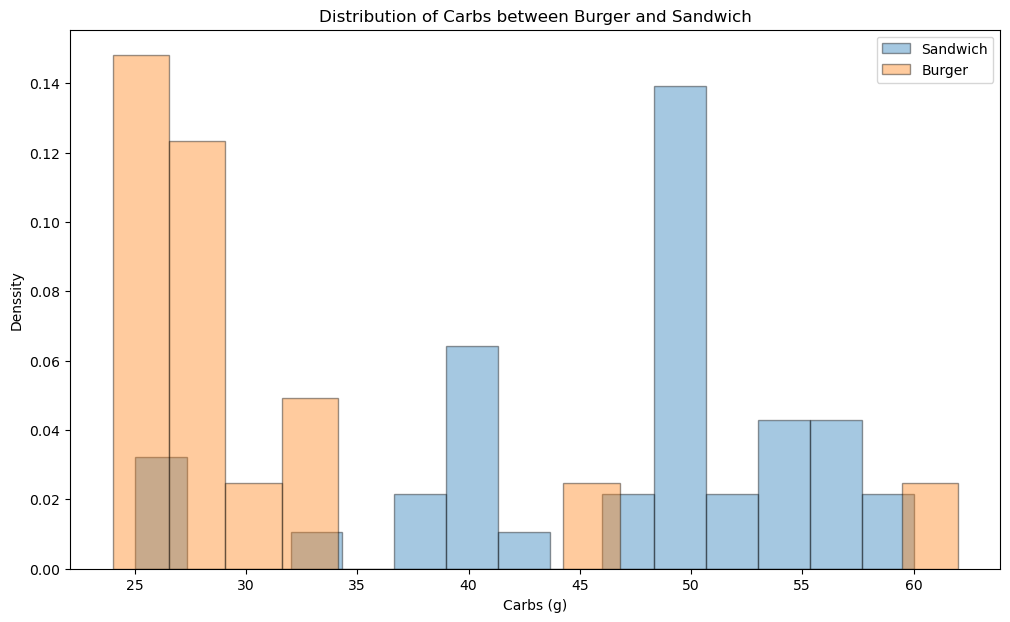

In [17]:
# Vẽ biểu đồ histogram phân phối lượng carbohydrate cho 2 loại bánh mì sandwich và burger
plt.subplots(figsize=(12,7))
plt.hist(sandwich_df['Carbs(g)'].dropna(), bins=15, density=True, edgecolor='black', alpha=0.4, label='Sandwich')
plt.hist(burger_df['Carbs(g)'].dropna(), bins=15, density=True, edgecolor='black', alpha=0.4, label='Burger')

plt.xlabel('Carbs (g)')
plt.ylabel('Denssity')
plt.title('Distribution of Carbs between Burger and Sandwich')
plt.legend()
plt.show()

**Nhận xét về sự phân phối lượng Carbs cho 2 loại bánh mì burger và sandwich**

- Từ biểu đồ ta thấy, hàm lượng Carbs của sandwich và burger nằm trong khoảng 25-60g/bánh mì.
- Các loại sandwich có lượng Carbs phân bố chủ yếu ở mức 30-55g/sandwich. Trong đó, sandwich có lượng Carbs khoảng 50g là nhiều nhất.
- Các loại burger có lượng Carbs phân bố chủ yếu ở mức 25-35g/burger, thấp hơn nhiều so với đa số các loại sandwich. Trong đó, burger có lượng Carbs khoảng 25-30g là nhiều nhất. Ngoài ra, một số loại burger có lượng Carbs rất lớn từ 60g trở lên.

**Bước 3:** Tính tỉ lệ chất xơ, tỉ lệ đường và tỉ lệ các chất carbohydrates khác của 2 loại bánh mì theo từng cửa hàng.

In [18]:
# Hàm tính tỉ lệ chất xơ, tỉ lệ đường và tỉ lệ các chất carbs khác theo từng cửa hàng
def calculate_fiber_sugar_ratio(df):
    df['Fiber'] = df['Fiber(g)'] / df['Carbs(g)']
    df['Sugar'] = df['Sugars(g)'] / df['Carbs(g)']
    df['Other'] = 1 - df['Sugar'] - df['Fiber']
    ratio_carbs = df.groupby('Company', observed=False)[['Fiber', 'Sugar', 'Other']].mean()
    ratio_carbs = ratio_carbs.dropna(how='all')
    ratio_carbs
    return ratio_carbs
    

In [19]:
# Tính tỉ lệ các chất carbs trong sandwich của từng cửa hàng
sandwich_carbs_ratio = calculate_fiber_sugar_ratio(sandwich_df)
sandwich_carbs_ratio

,Fiber,Sugar,Other
Company,,,
Burger King,0.041596,0.197886,0.760518
KFC,0.025727,0.175004,0.759307
McDonald’s,0.067652,0.192252,0.740096
Wendy’s,0.057649,0.151119,0.791232


In [20]:
# Tính tỉ lệ các chất carbs trong burger của từng cửa hàng
burger_carbs_ratio = calculate_fiber_sugar_ratio(burger_df)
burger_carbs_ratio

,Fiber,Sugar,Other
Company,,,
Burger King,0.038502,0.242654,0.718844
McDonald’s,0.054051,0.225957,0.719992
Wendy’s,0.046840,0.219672,0.733487


**Bước 4:** Vẽ biểu đồ tròn cho biết tỉ lệ các chất carbs có trong từng loại bánh mì của mỗi cửa hàng và nêu nhận xét.

In [21]:
# Hàm vẽ các biểu đồ tròn thể hiện tỉ lệ các chất Carbs trong bánh mì cho từng cửa hàng.
def visualize_carbs_ratio(ratio_carbs, name_dish):
    ratio = ratio_carbs.columns
    company = ratio_carbs.index
    num_pies = len(company)
    
    fig, axes = plt.subplots(nrows=1, ncols=num_pies, figsize=(18,num_pies+1))
    axes = axes.flatten()
    fig.suptitle(f"The carbohydrate composition ratio of {name_dish} at each fast food restaurant",  y=0.7+1/num_pies, fontsize=16)
        
    for i in range(len(company)):
        sizes = ratio_carbs.loc[company[i]]
        axes[i].pie(sizes, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{company[i]}', fontsize=14)
    
    plt.legend(list(ratio), bbox_to_anchor=(1, 1), fontsize=14)
    plt.show()

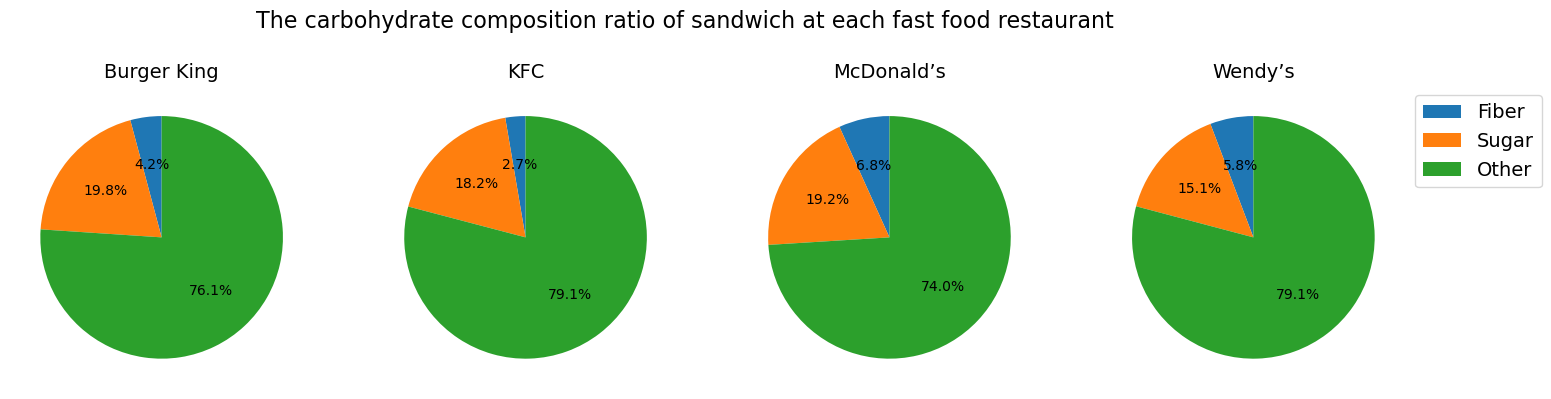

In [22]:
# Biểu đồ thể hiện tỉ lệ các chất Carbs có trong sandwich theo từng cửa hàng.
visualize_carbs_ratio(sandwich_carbs_ratio, "sandwich")

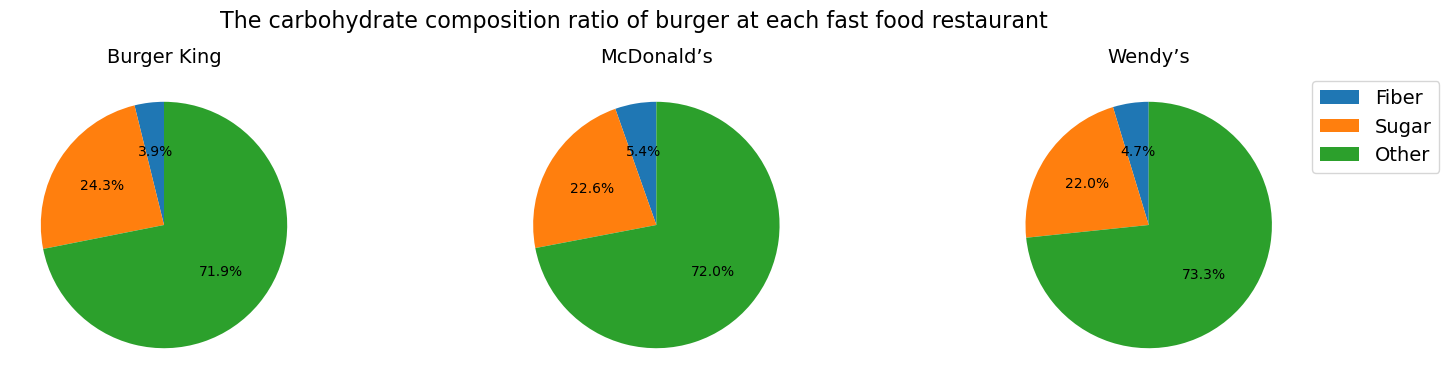

In [23]:
# Biểu đồ thể hiện tỉ lệ các chất Carbs có trong burger theo từng cửa hàng.
visualize_carbs_ratio(burger_carbs_ratio, "burger")

**Nhận xét về tỉ lệ các chất Carbs có trong từng loại bánh mì của mỗi cửa hàng**

**Tổng quan**
- Có 4 cửa hàng có món sandwich là: Burger King, KFC, McDonald's và Wendy's. Trong khi đó, có 3 cửa hàng có burger là: Burger King, McDonald's và Wendy's.
- Các loại bánh mì burger ở tất cả các cửa hàng đều có tỉ lệ lượng đường (sugar) cao hơn so với các loại sandwich.
- Ở 3 cửa hàng là Burger King, McDonald's và Wendy's, lượng chất xơ (fiber) có trong các bánh mì burger thường có giá trị thấp hơn so với các loại sandwich của cùng một cửa hàng.

**Chi tiết**
- Đối với sandwich:
    - Tỉ lệ lượng đường (sugar) trung bình có trong các loại sandwich của Burger King cao hơn so với tất cả các cửa hàng còn lại, Wendy's có tỉ lệ lượng đường trong sandwich thấp nhất. Tuy nhiên, tỉ lệ lượng đường trong sandwich của 3 cửa hàng Burger King, KFC, McDonald's chênh lệch nhau không đáng kể.
    - Sandwich của KFC có tỉ lệ lượng chất xơ (fiber) thấp nhất và thấp hơn rất nhiều so với các cửa hàng còn lại, trong khi sandwich của McDonald's có tỉ lệ lượng chất xơ (fiber) cao nhất.
    - Sandwich của Wendy's không chỉ có tỉ lệ lượng đường thấp mà tỉ lệ chất xơ còn cao thứ 2 trong tất cả các cửa hàng. Đây có thể là lựa chọn lý tưởng cho những người có chế độ ăn hạn chế đường và cần nhiều chất xơ.
 
- Đối với burger:
    - Tỉ lệ lượng đường (sugar) trung bình có trong các loại burger của Burger King cao nhất và Wendy's có tỉ lệ đường trong burger thấp nhất, tuy nhiên tỉ lệ lượng đường trong burger của 3 cửa hàng này chênh lệch nhau không đáng kể.
    - Tỉ lệ chất xơ (fiber) trong burger của Burger King thấp nhất và cao nhất là của McDonald's.
 

#### Câu hỏi 2. Những món ăn có hàm lượng calo hoặc chất béo cao nhất, thấp nhất và mối quan hệ giữa chúng?

- **Ý nghĩa khi trả lời câu hỏi**: phân tích này giúp xác định các món ăn "nặng" và "nhẹ" nhất về mặt năng lượng và chất béo, hữu ích cho việc lựa chọn thực phẩm dựa trên mục tiêu dinh dưỡng cá nhân (ví dụ: giảm cân, tăng cân, chế độ ăn ít chất béo). Hữu ích cho những người đang theo dõi lượng calo và chất béo trong chế độ ăn uống của mình. Nó cung cấp cái nhìn tổng quan về cách thức lượng chất béo ảnh hưởng đến lượng calo, giúp họ lựa chọn các món ăn phù hợp với mục tiêu dinh dưỡng của mình.

**Mối quan hệ giữa calo và chất béo:**
- **Ý Nghĩa**: phân tích này giúp hiểu rõ mối quan hệ giữa lượng calo và chất béo trong các món ăn. Việc này có thể tiết lộ liệu chất béo có phải là nguồn chính của calo trong thực phẩm hay không.

In [24]:
# Identifying the items with the highest and lowest calorie and fat content
highest_calories = fastfood_df.nlargest(1, 'Calories')
lowest_calories = fastfood_df.nsmallest(1, 'Calories')
highest_fat = fastfood_df.nlargest(1, 'Total Fat(g)')
lowest_fat = fastfood_df.nsmallest(1, 'Total Fat(g)')

# Compile the results
extreme_values = {
    "Highest Calorie Item": highest_calories[['Item', 'Calories']],
    "Lowest Calorie Item": lowest_calories[['Item', 'Calories']],
    "Highest Fat Item": highest_fat[['Item', 'Total Fat(g)']],
    "Lowest Fat Item": lowest_fat[['Item', 'Total Fat(g)']]
}

extreme_values

{'Highest Calorie Item':                                      Item  Calories
 334  Triple Whopper® Sandwich with Cheese    1220.0,
 'Lowest Calorie Item':            Item  Calories
 38  Salt Packet       0.0,
 'Highest Fat Item':                       Item  Total Fat(g)
 730  Potato Salad (Family)          98.0,
 'Lowest Fat Item':               Item  Total Fat(g)
 37  Ketchup Packet           0.0}

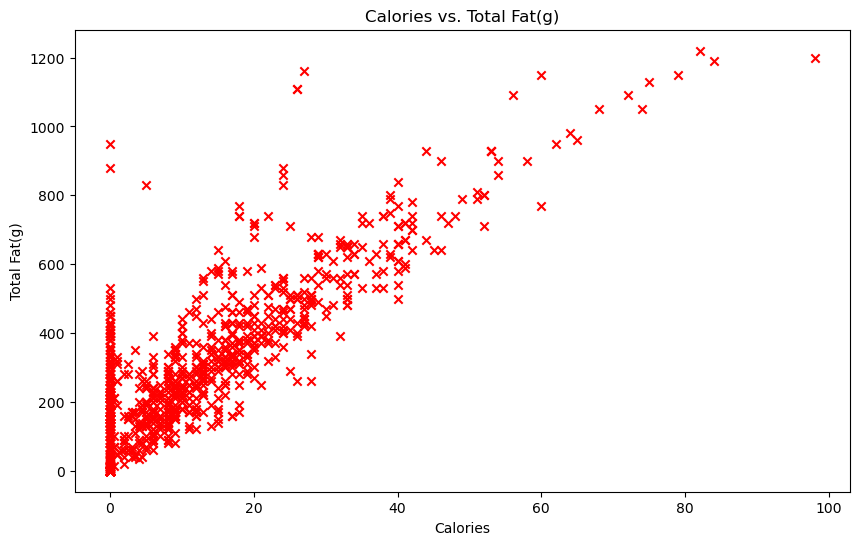

In [25]:
# scatter plot of calories vs. fat
plt.figure(figsize=(10, 6))
plt.scatter(fastfood_df['Total Fat(g)'], fastfood_df['Calories'], marker='x', color='red')
plt.xlabel('Calories')
plt.ylabel('Total Fat(g)')
plt.title('Calories vs. Total Fat(g)')
plt.show()

**Nhận xét:** có xu hướng tăng dần khi lượng chất béo tăng, lượng calo cũng có xu hướng tăng theo. Điều này có nghĩa là các món ăn có nhiều chất béo thường chứa nhiều calo hơn.

Mối quan hệ không hoàn toàn tuyến tính: mặc dù có xu hướng tăng, nhưng mối quan hệ giữa chất béo và calo không hoàn toàn tuyến tính. Điều này cho thấy có các yếu tố khác cũng đóng góp vào lượng calo của món ăn (ví dụ: carbs, protein).

**Câu hỏi 2. Những món ăn có điểm Weight Watchers thấp?**

**Mục tiêu chính:** tìm ra những món ăn có số điểm Weight Watchers thấp, được coi là lựa chọn tốt cho việc giảm cân. Điểm Weight Watchers thấp thường chỉ ra rằng món ăn có ít calo, ít chất béo và đường, và/hoặc nhiều chất xơ.

**So sánh điểm Weight Watchers giữa các công ty hoặc loại món ăn:**

**Ý Nghĩa:** giúp so sánh lựa chọn thực phẩm giữa các công ty khác nhau từ góc độ giảm cân và sức khỏe. Điều này hữu ích cho những người theo dõi chế độ ăn kiêng và muốn lựa chọn thực phẩm tốt cho sức khỏe.

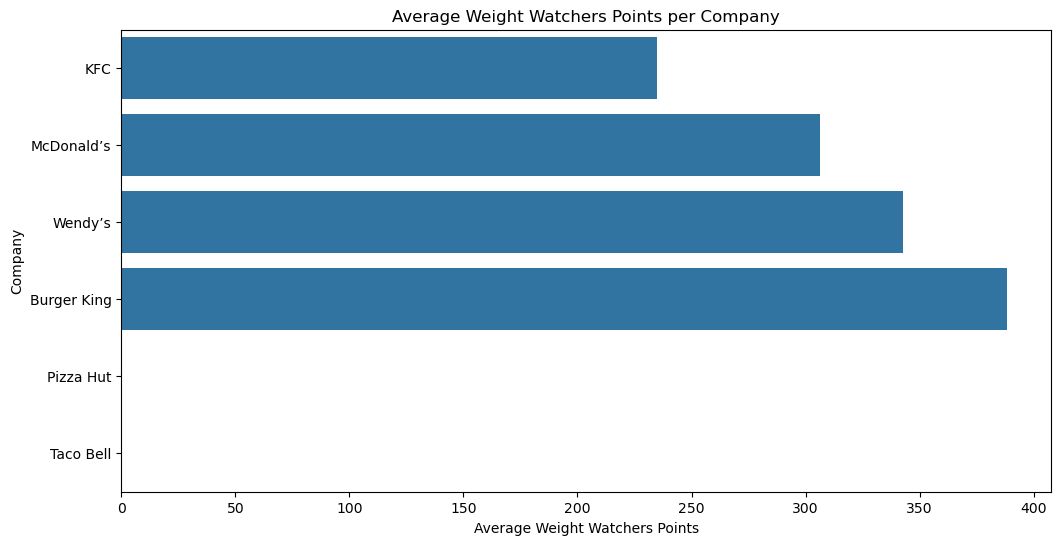

(        Company                 Item  Weight WatchersPnts
 38   McDonald’s          Salt Packet                  0.0
 147  McDonald’s        Dasani® Water                  0.0
 155  McDonald’s   Diet Coke® (Child)                  0.0
 156  McDonald’s   Diet Coke® (Small)                  0.0
 157  McDonald’s  Diet Coke® (Medium)                  0.0,
 Company
 KFC            234.901376
 McDonald’s     306.426154
 Wendy’s        342.850649
 Burger King    388.296512
 Pizza Hut             NaN
 Taco Bell             NaN
 Name: Weight WatchersPnts, dtype: float64)

In [26]:
# Find items with the lowest Weight Watchers points
lowest_ww_points = fastfood_df.nsmallest(5, 'Weight WatchersPnts')[['Company', 'Item', 'Weight WatchersPnts']]

# Now let's calculate the average Weight Watchers points for each company
average_ww_points_per_company = fastfood_df.groupby('Company')['Weight WatchersPnts'].mean().sort_values()

# Preparing for visualization
companies = average_ww_points_per_company.index.tolist()
average_points = average_ww_points_per_company.values

# Create bar chart for the average Weight Watchers points per company
plt.figure(figsize=(12, 6))
sns.barplot(x=average_points, y=companies)
plt.title('Average Weight Watchers Points per Company')
plt.xlabel('Average Weight Watchers Points')
plt.ylabel('Company')

# Show the plot
plt.show()

lowest_ww_points, average_ww_points_per_company

**Nhận xét các món ăn có điểm Weight Watchers thấp nhất::**

Một số món ăn từ McDonald’s như "Salt Packet", "Dasani® Water", "Diet Coke® (Child)", "Diet Coke® (Small)", và "Diet Coke® (Medium)" đều có 0 điểm Weight Watchers, làm chúng trở thành lựa chọn tốt cho việc giảm cân.


**So sánh điểm Weight Watchers trung bình giữa các công ty:**

KFC có điểm Weight Watchers trung bình thấp nhất, theo sau là McDonald’s và Wendy’s.
Burger King có điểm trung bình cao hơn so với các công ty khác.
Lưu ý: Dữ liệu cho Pizza Hut và Taco Bell không đủ để tính điểm trung bình.

Phân tích này giúp những người theo dõi chế độ ăn kiêng Weight Watchers hoặc những người quan tâm đến việc giảm cân và duy trì sức khỏe hiểu rõ hơn về lựa chọn thực phẩm tại các chuỗi nhà hàng nhanh. Nó cung cấp cái nhìn sâu sắc về việc chọn thực phẩm ít calo, ít chất béo và đường, nhưng giàu chất xơ, từ các chuỗi cửa hàng này. ​

### Câu 4: Phân tích mối liên hệ giữa các yếu tố chất béo và các yếu tố dinh dưỡng khác?

**Ý nghĩa khi trả lời câu hỏi:** 
- Giúp ta có cái nhìn tổng quan về mối liên hệ giữa các yếu tố về chất béo `Total Fat(g)`, `Saturated Fat(g)`, `Trans Fat(g)` và các yếu tố còn lại. Từ đó, ta sẽ biết được liệu trong một món đồ ăn nhanh ngoài các yếu tố chất béo như ta đã biết thì có còn những yếu tố dinh dưỡng khác hay không?

**Các bước cần làm để để trả lời câu hỏi:**
- Bước 1: Ta sẽ tiến hành tiến hành tính toán ma trận tương quan và lưu vào `correlation_matrix`
- Bước 2: Trực quan hóa ma trận tương quan bằng `heatmap`.
- Bước 3: Phân tích và nhận xét.

**Bước 1**: Ta sẽ tiến hành tiến hành tính toán ma trận tương quan và lưu vào `correlation_matrix`

In [50]:
# Tính toán ma trận tương quan
correlation_matrix = fastfood_df[['Total Fat(g)', 'Saturated Fat(g)', 'Trans Fat(g)', 'Calories', 'Protein(g)', 'Carbs(g)', 'Fiber(g)', 'Sugars(g)']].corr()
correlation_matrix

,Total Fat(g),Saturated Fat(g),Trans Fat(g),Calories,Protein(g),Carbs(g),Fiber(g),Sugars(g)
Total Fat(g),1.000000,0.882870,0.552322,0.840858,0.806674,0.186578,0.462408,-0.238926
Saturated Fat(g),0.882870,1.000000,0.674849,0.805154,0.768492,0.255650,0.319491,-0.089161
Trans Fat(g),0.552322,0.674849,1.000000,0.557484,0.587201,0.225116,0.067516,0.084261
Calories,0.840858,0.805154,0.557484,1.000000,0.742892,0.673151,0.469904,0.256649
Protein(g),0.806674,0.768492,0.587201,0.742892,1.000000,0.140964,0.436350,-0.234150
Carbs(g),0.186578,0.255650,0.225116,0.673151,0.140964,1.000000,0.199850,0.823726
Fiber(g),0.462408,0.319491,0.067516,0.469904,0.436350,0.199850,1.000000,-0.256339
Sugars(g),-0.238926,-0.089161,0.084261,0.256649,-0.234150,0.823726,-0.256339,1.000000


**Bước 2**: Trực quan hóa ma trận tương quan bằng `heatmap`.

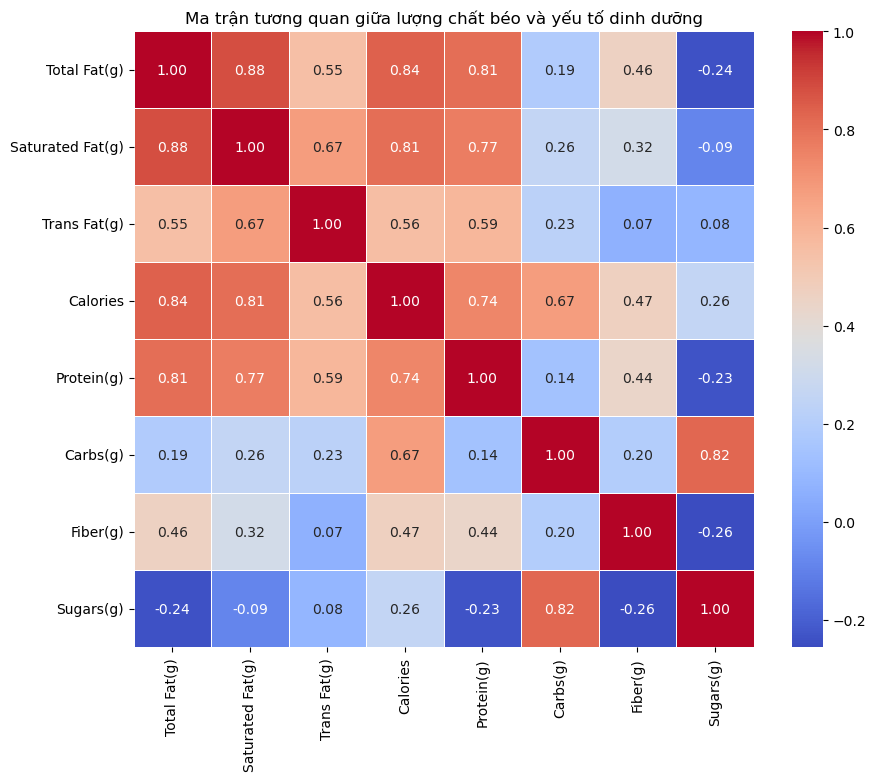

In [51]:
# Hiển thị ma trận tương quan bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Biểu Đồ thể hiện mối liên hệ giữa lượng chất béo và yếu tố dinh dưỡng')
plt.show()

**Bước 3:** Phân tích và nhận xét

- `Saturated Fat(g)` và `Total Fat(g)` có hệ số tương quan khá cao (0.88) cho thấy hai đại lượng này có mối liên hệ chặt chẽ với nhau. Nó biểu thị `Saturated Fat(g)` đóng góp quan trọng vào chỉ số `Total Fat(g)`.
- Hệ số tương quan giữa `Total Fat(g)` với `Calories` và `Protein` cũng ở mức cao (0.84 và 0.81). Điều này cho thấy món ăn nhanh có hàm lượng chất béo càng cao thì càng cung cấp cho cơ thể nhiều năng lượng và chứa nhiều protein. Ngoài ra, hệ số tương quan giữa `Total Fat(g)` và `Sugars(g)` là số âm chỉ ra lượng đường có xu hướng giảm khi lượng chất béo tăng.
- `Calories` có mối quan hệ dương với `Protein(g)` (0.742892) và `Carbs(g)` (0.673151), cho thấy lượng protein và carbohydrates đóng góp nhiều vào lượng calo.
- `Sugars(g)` có hệ số tương quan lớn với `Carbs(g)` (0.823726), chỉ ra rằng đường thường xuất hiện trong thực phẩm giàu carbohydrates. Tuy nhiên, hệ số tương quan giữa `Sugars(g)` với các yếu tố về chất béo thường ở mức thấp hoặc ở mức âm chỉ ra lượng đường có xu hướng giảm khi lượng chất béo tăng.
- Mối quan hệ âm giữa `Fiber(g)` và `Sugars(g)` là một điểm quan trọng. Sự tương quan âm (-0.256339) chỉ ra rằng mức độ chất xơ thường giảm khi lượng đường tăng. Bên cạnh đó hàm lượng chất xơ cũng ít chịu ảnh hưởng bởi các yếu tố khác khi hệ số tương quan luôn nằm ở mức thấp.